The columns in the given dataset are as follows:

name

year

selling_price

km_driven

fuel

seller_type

transmission

Owner

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [96]:
dataset=pd.read_csv(r'C:\Users\priya\OneDrive\Documents\PROJECTS\Data_analytics\car_prediction\car data.csv')

In [97]:
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [98]:
dataset.shape

(301, 9)

In [99]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [100]:
dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [101]:
print(dataset['Fuel_Type'].value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64


In [102]:
print(dataset['Seller_Type'].value_counts())

Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64


In [103]:
print(dataset['Transmission'].value_counts())

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [104]:
# encoding "Fuel_Type" Column
dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding "Seller_Type" Column
dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding "Transmission" Column
dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

C:\Users\priya\AppData\Local\Temp\ipykernel_11224\3179295319.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
C:\Users\priya\AppData\Local\Temp\ipykernel_11224\3179295319.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
C:\Users\priya\AppData\Local\Temp\ipykernel_11224\3179295319.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a futur

In [105]:
# dataset=dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2},'Seller_Type':{'Dealer':0,'Individual':1},'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [106]:
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [107]:
X=dataset.drop(columns=['Car_Name','Selling_Price'],axis=1)
Y=dataset.Selling_Price

In [108]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [109]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [115]:
##splitting dataset into training and test data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=2)

In [141]:
# loading the linear regression model
lin_model = LinearRegression()

In [120]:
lin_model.fit(X_train,Y_train)

LinearRegression()

Model Evaluation

In [121]:
train_prediction=lin_model.predict(X_train)

In [123]:
##R square score
error_score=metrics.r2_score(Y_train,train_prediction)
print('R Squared Error:',error_score)

R Squared Error: 0.8799451660493699


Visualize the actual prices and predicted prices

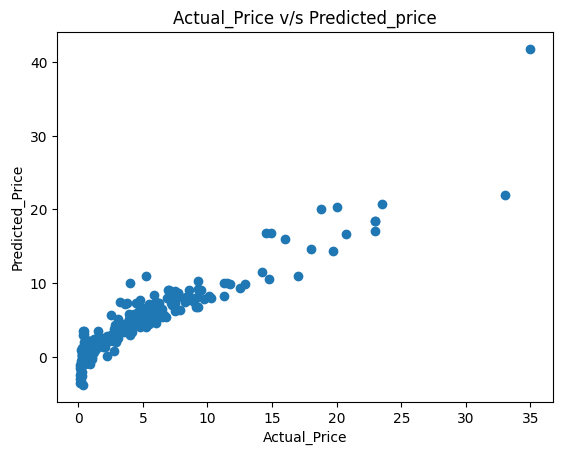

In [138]:
plt.scatter(Y_train,train_prediction)
plt.xlabel('Actual_Price')
plt.ylabel('Predicted_Price')
plt.title('Actual_Price v/s Predicted_price')
plt.show()

In [139]:
test_prediction=lin_model.predict(X_test)
error_score=metrics.r2_score(Y_test,test_prediction)
print('R Squared Error:',error_score)

R Squared Error: 0.8365766715026473


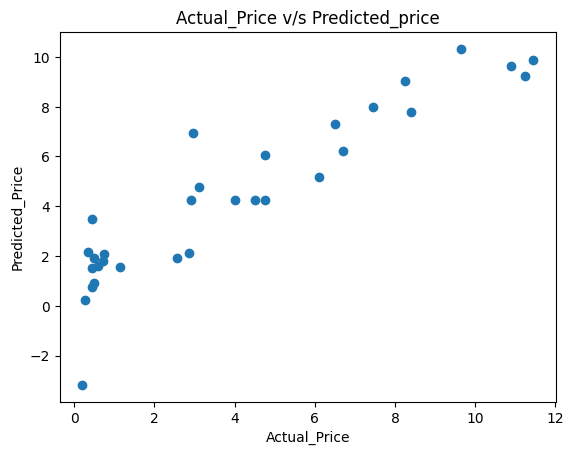

In [140]:
plt.scatter(Y_test,test_prediction)
plt.xlabel('Actual_Price')
plt.ylabel('Predicted_Price')
plt.title('Actual_Price v/s Predicted_price')
plt.show()

Lasso

In [145]:
##splitting dataset into training and test data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=2)

In [146]:
# loading the lasso regression model
laso_model = Lasso()

In [147]:
laso_model.fit(X_train,Y_train)

Lasso()

Model Evaluation

In [148]:
train_prediction=laso_model.predict(X_train)

In [154]:
##R square score
error_score=metrics.r2_score(Y_train,train_prediction)
print('R Squared Error:',error_score)

R Squared Error: 0.8427856123435795


Visualize the actual prices and predicted prices

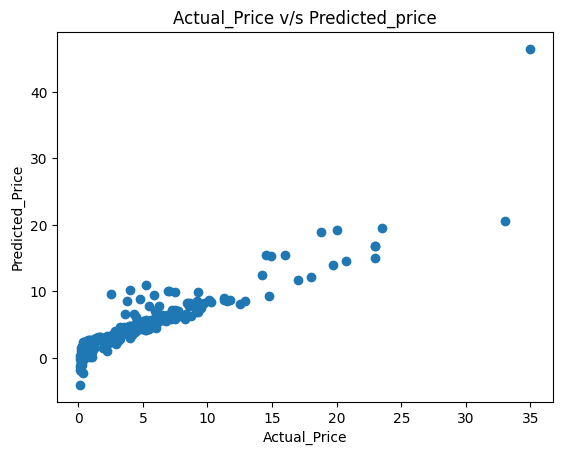

In [155]:
plt.scatter(Y_train,train_prediction)
plt.xlabel('Actual_Price')
plt.ylabel('Predicted_Price')
plt.title('Actual_Price v/s Predicted_price')
plt.show()

In [156]:
test_prediction=laso_model.predict(X_test)
error_score=metrics.r2_score(Y_test,test_prediction)
print('R Squared Error:',error_score)

R Squared Error: 0.8709167941173201


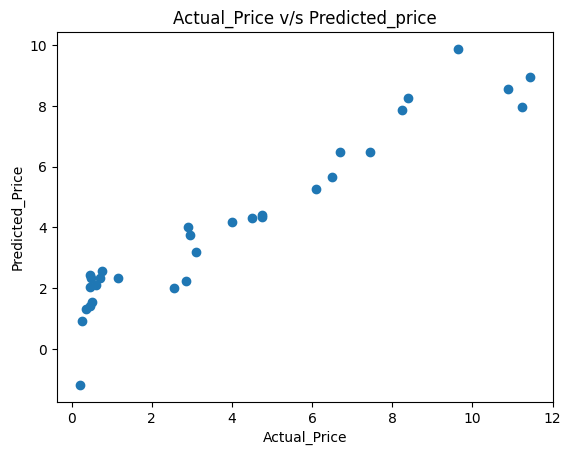

In [157]:
plt.scatter(Y_test,test_prediction)
plt.xlabel('Actual_Price')
plt.ylabel('Predicted_Price')
plt.title('Actual_Price v/s Predicted_price')
plt.show()